# Project1 _ 금리가 인상할때, 가격이 크게 올랐던 섹터 및 감소 했던 섹터는?

## 국채 10Y Rate 관찰

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,743 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and dire

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<Axes: xlabel='Date'>

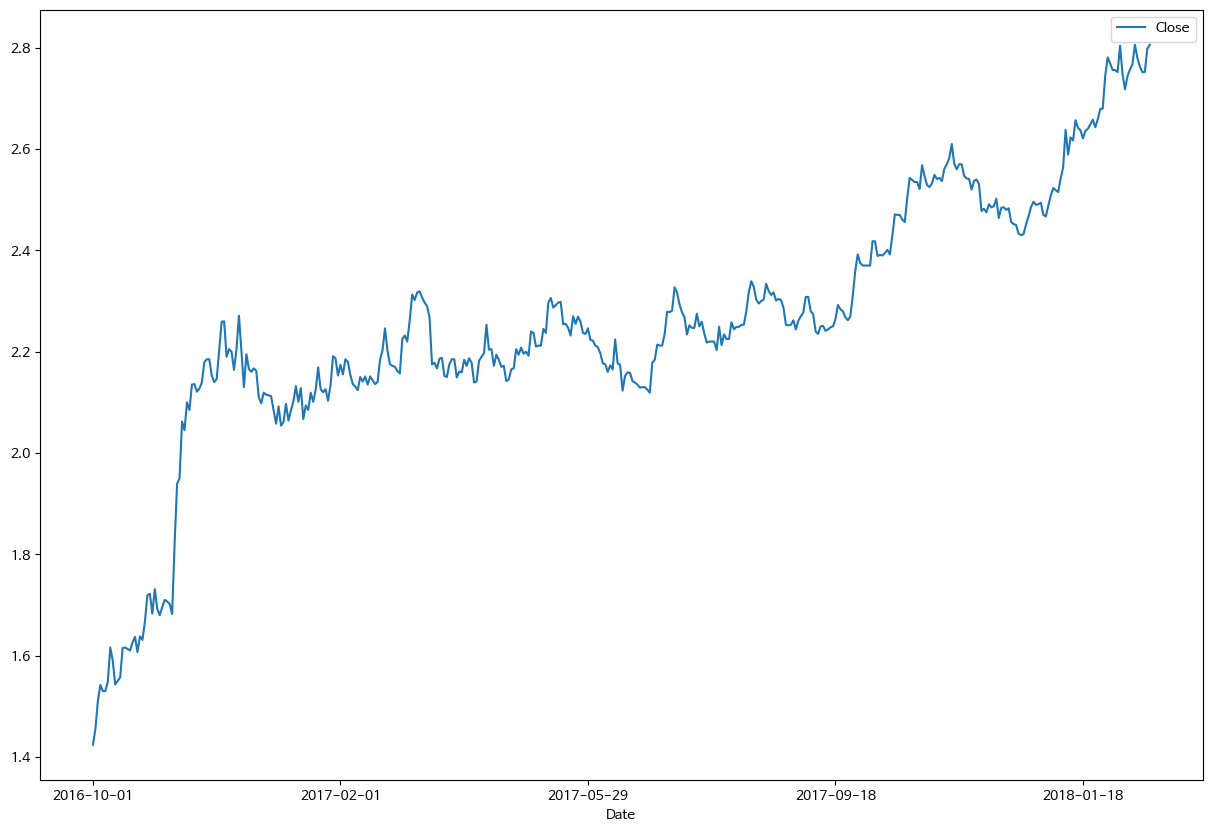

In [ ]:
# 필요한 라이브러리 설치 및 설정
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (시각화를 위해 설정)
plt.rc('font', family='NanumBarunGothic')

df_10Y_rate = pd.read_csv('/content/drive/MyDrive/판다스/Pandas/Data/10Y Rate.csv', index_col = 'Date')
df_10Y_rate_close = df_10Y_rate[['Close']] #종가를 기준으로 판단

# 종가 데이터에서 최소값을 찾아 해당 행 제거
drop_index = df_10Y_rate_close['Close'].idxmin()  # 최소값의 인덱스 반환
df_10Y_rate_close = df_10Y_rate_close.drop(drop_index, axis=0)

# 2016년 10월 1일부터 2018년 2월 20일까지의 데이터만 슬라이싱
df_10Y_rate_close_sample = df_10Y_rate_close.loc['2016-10-01':'2018-02-20']
df_10Y_rate_close_sample

In [ ]:
import plotly.express as px

# Plotly를 사용한 시각화
fig = px.line(
    df_10Y_rate_close_sample,
    x=df_10Y_rate_close_sample.index,
    y='Close',
    title="10년 금리 (2016-10-01 ~ 2018-02-20)",
    labels={"Close": "종가 (Close)", "index": "날짜"}
)
fig.update_layout(
    xaxis_title="날짜",
    yaxis_title="종가 (Close)",
    xaxis=dict(showgrid=False),  # x축 격자선 제거
    yaxis=dict(showgrid=True),  # y축 격자선 유지
    template="plotly_white"  # 밝은 배경 테마
)
fig.show()


## 분석할 섹터 고르기</br>

*** KODEX ETF DataFrame 만들기 </br>
*** krx_df에서 KODEX ETF만 뽑아내기</br>

In [ ]:
# KRX 데이터를 로드
krx_df = pd.read_csv("/content/drive/MyDrive/판다스/Pandas/Data/KRX.csv", encoding='cp949', index_col=0)

# 리스트 컴프리헨션을 사용하여 'KODEX'가 포함된 인덱스 선택
kodex_index = [index for index in range(krx_df.shape[0]) if 'KODEX' in krx_df['Name'].values[index]]
kodex_etf_info = krx_df.iloc[kodex_index]

# 데이터의 모양 확인
print(kodex_etf_info.shape)

# 섹터 리스트 생성
sector_list = [
    'KODEX 200', 'KODEX IT', 'KODEX 건설', 'KODEX 게임산업', 'KODEX 경기소비재', 'KODEX 고배당', 'KODEX 골드선물(H)',
    'KODEX 구리선물(H)', 'KODEX 기계장비', 'KODEX 바이오', 'KODEX 반도체', 'KODEX 보험', 'KODEX 에너지화학', 'KODEX 운송',
    'KODEX 은행', 'KODEX 자동차', 'KODEX 증권', 'KODEX 철강', 'KODEX 필수소비재', 'KODEX 헬스케어'
]

# 선택된 섹터 리스트 출력
print(sector_list)

(130, 11)
['KODEX 200', 'KODEX IT', 'KODEX 건설', 'KODEX 게임산업', 'KODEX 경기소비재', 'KODEX 고배당', 'KODEX 골드선물(H)', 'KODEX 구리선물(H)', 'KODEX 기계장비', 'KODEX 바이오', 'KODEX 반도체', 'KODEX 보험', 'KODEX 에너지화학', 'KODEX 운송', 'KODEX 은행', 'KODEX 자동차', 'KODEX 증권', 'KODEX 철강', 'KODEX 필수소비재', 'KODEX 헬스케어']


## KODEX Sector DataFrame</br>


*** 위에서 선택한 Sector_list에 해당하는 KODEX Sector DF 만든다</br>
*** 관찰할 Sample DataFrame을 만든다</br>

In [ ]:
# KODEX ETF 데이터 로드
kodex_etf_price_df = pd.read_csv("/content/drive/MyDrive/판다스/Pandas/Data/KODEX_ETF.csv", index_col = "Date")
kodex_etf_price_df

,KODEX 200,KODEX 200 중소형,KODEX 200ESG,KODEX 200IT TR,KODEX 200TR,KODEX 200exTOP,KODEX 200가치저변동,KODEX 200동일가중,KODEX 200롱코스닥150숏선물,KODEX 200미국채혼합,...,KODEX 코스피100,KODEX 코스피TR,KODEX 코스피대형주,KODEX 콩선물(H),KODEX 퀄리티Plus,KODEX 탄소효율그린뉴딜,KODEX 필수소비재,KODEX 한국대만IT프리미어,KODEX 헬스케어,KODEX 혁신기술테마액티브
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,20592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8840,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,21239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8860,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,21118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8960,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,21081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8995,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,20784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8860,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,39820,13590.0,14300.0,13960.0,13070.0,13325.0,10925.0,11990.0,10305.0,13320.0,...,30660.0,13890.0,14075.0,11570,10355.0,9715.0,8370.0,20830.0,15875.0,13145.0
2021-12-24,40115,13745.0,14470.0,14135.0,13160.0,13425.0,10955.0,12070.0,10300.0,13340.0,...,30795.0,13960.0,14175.0,11525,10405.0,9790.0,8350.0,20855.0,15785.0,13210.0
2021-12-27,39880,13735.0,14385.0,14000.0,13100.0,13405.0,10925.0,12060.0,10180.0,13320.0,...,30630.0,13905.0,14095.0,11640,10475.0,9775.0,8350.0,21025.0,16015.0,13195.0


In [ ]:
# KODEX ETF 데이터에서 섹터 리스트에 해당하는 컬럼만 선택
kodex_sector_df = kodex_etf_price_df[sector_list]

# 섹터별 결측값 확인
missing_values = kodex_sector_df.isna().sum(axis=0)

# 결측값 결과 출력
print("섹터별 결측값 개수:")
missing_values



섹터별 결측값 개수:


,0
KODEX 200,0
KODEX IT,1292
KODEX 건설,0
KODEX 게임산업,1614
KODEX 경기소비재,1292
KODEX 고배당,1425
KODEX 골드선물(H),0
KODEX 구리선물(H),0
KODEX 기계장비,0
KODEX 바이오,1075


In [ ]:
#(2016년 10월 1일부터 2018년 2월 20일까지)에 대해 결측값의 개수를 컬럼별로 계산
kodex_sector_df.loc['2016-10-01':'2018-02-20'].isna().sum(axis = 0)

,0
KODEX 200,0
KODEX IT,121
KODEX 건설,0
KODEX 게임산업,340
KODEX 경기소비재,121
KODEX 고배당,254
KODEX 골드선물(H),0
KODEX 구리선물(H),0
KODEX 기계장비,0
KODEX 바이오,0


In [ ]:
# 날짜 기간과 맞지 않는 섹터를 제거하기 위한 리스트
drop_list = ['KODEX 게임산업', 'KODEX 고배당', 'KODEX IT', 'KODEX 필수소비재', 'KODEX 헬스케어', 'KODEX 경기소비재']

# drop_list에 포함된 섹터를 데이터프레임에서 제거
kodex_sector_df = kodex_sector_df.drop(drop_list, axis=1)

# 수정된 데이터프레임 확인
print("제거 후 섹터 데이터프레임:")
kodex_sector_df

제거 후 섹터 데이터프레임:


,KODEX 200,KODEX 건설,KODEX 골드선물(H),KODEX 구리선물(H),KODEX 기계장비,KODEX 바이오,KODEX 반도체,KODEX 보험,KODEX 에너지화학,KODEX 운송,KODEX 은행,KODEX 자동차,KODEX 증권,KODEX 철강
Date,,,,,,,,,,,,,,
2012-01-02,20592,5101,11975,7900,14745,NaN,13969,5784,9967,4966,5359,19290,4849,9084
2012-01-03,21239,5234,12110,7990,15434,NaN,14180,5862,10349,5117,5513,19829,5003,9348
2012-01-04,21118,5224,12170,8000,15539,NaN,14097,5877,10258,5141,5435,19936,5017,9528
2012-01-05,21081,5255,12380,7955,15419,NaN,14102,5889,10510,5131,5376,20051,5012,9605
2012-01-06,20784,5116,12390,7920,15203,NaN,13983,5784,10294,5047,5345,19657,4926,9433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,39820,3375,12195,8085,5550,12315.0,38760,6545,18030,5755,7550,20925,8135,8530
2021-12-24,40115,3400,12200,8080,5530,12200.0,38700,6565,18235,5740,7565,21585,8175,8540
2021-12-27,39880,3350,12220,8010,5495,12340.0,38575,6580,18180,5660,7475,21460,8140,8480


In [ ]:
# kodex_sector_df에서 2016년 10월 1일부터 2018년 2월 20일까지의 데이터를 슬라이싱하여 추출
kodex_sector_df_sample = kodex_sector_df.loc['2016-10-01':'2018-02-20']

kodex_sector_df_sample

,KODEX 200,KODEX 건설,KODEX 골드선물(H),KODEX 구리선물(H),KODEX 기계장비,KODEX 바이오,KODEX 반도체,KODEX 보험,KODEX 에너지화학,KODEX 운송,KODEX 은행,KODEX 자동차,KODEX 증권,KODEX 철강
Date,,,,,,,,,,,,,,
2016-10-04,23289,2845,10025,4770,6055,9802.0,19328,7325,9433,3185,5319,16658,4840,8011
2016-10-05,23276,2832,9725,4730,6026,9627.0,19472,7200,9437,3175,5290,16668,4810,7904
2016-10-06,23436,2859,9705,4730,6142,9522.0,19386,7235,9352,3155,5319,16440,4794,7914
2016-10-07,23364,2874,9595,4675,6167,9143.0,19284,7217,9330,3155,5286,16389,4794,7790
2016-10-10,23402,2894,9685,4730,6182,9223.0,18959,7307,9398,3150,5410,16403,4832,7892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-12,28732,2765,9885,6405,5365,12392.0,25928,8496,12820,2973,8011,15281,7231,9678
2018-02-13,28954,2726,9910,6480,5185,12117.0,25938,8413,12839,2924,7993,15028,7066,9612
2018-02-14,29332,2765,9955,6560,5312,12492.0,26445,8399,12900,2958,7973,15084,7074,9664


## 국고채 10년 DataFrame과 KODEX Sector DataFrame의 Shape 비교</br>

*** 국고채 10년 DataFrame과 KODEX Sector DataFrame Index 비교하기</br>
*** 프로젝트에 필요한 새로운 DataFrame을 만든다

In [ ]:
# 국고채 10년 데이터프레임과 KODEX 섹터 데이터프레임의 Shape(크기) 비교

# 국고채 10년 데이터프레임의 Shape 출력
print("국고채 10년 데이터프레임 Shape:")
print(df_10Y_rate_close_sample.shape)

# KODEX 섹터 데이터프레임의 Shape 출력
print("KODEX 섹터 데이터프레임 Shape:")
print(kodex_sector_df_sample.shape)


국고채 10년 데이터프레임 Shape:
(428, 1)
KODEX 섹터 데이터프레임 Shape:
(340, 14)


In [ ]:
# 같은 날짜로 Sample 기간으로 만들었지만, 행의 갯수가 다르다

# 국고채 데이터프레임의 인덱스 중 KODEX 섹터 데이터프레임의 인덱스와 일치하는 항목 찾기
reindex_sample = df_10Y_rate_close_sample.index.isin(kodex_sector_df_sample.index)

# reindex_sample 결과 확인 (Boolean Series로 반환됨)
reindex_sample

# 국고채 데이터프레임에서 인덱스를 다시 설정하여 KODEX 섹터 데이터프레임과 일치시키기
df_10Y_rate_close_resample = df_10Y_rate_close_sample[reindex_sample]

# 다시 샘플링된 국고채 데이터프레임의 Shape 확인
df_10Y_rate_close_resample.shape


(340, 1)

In [ ]:
print("인덱스 일치 여부:")
print(df_10Y_rate_close_resample.index.equals(kodex_sector_df_sample.index))


인덱스 일치 여부:
True


In [ ]:
# 빈 데이터프레임 생성
df = pd.DataFrame()

# '10Y Rate' 열에 df_10Y_rate_close_resample 데이터를 추가
# df_10Y_rate_close_resample은 국고채 10년 데이터로, 재샘플링된 결과
df['10Y Rate'] = df_10Y_rate_close_resample

# 새로 생성된 데이터프레임 확인
df


,10Y Rate
Date,
2016-10-04,1.455
2016-10-05,1.511
2016-10-06,1.542
2016-10-07,1.530
2016-10-10,1.548
...,...
2018-02-12,2.806
2018-02-13,2.780
2018-02-14,2.763


In [ ]:
#두 개의 데이터 프레임을 합칩
for col in kodex_sector_df_sample.columns:
    df[col] = kodex_sector_df_sample[col]

df

,10Y Rate,KODEX 200,KODEX 건설,KODEX 골드선물(H),KODEX 구리선물(H),KODEX 기계장비,KODEX 바이오,KODEX 반도체,KODEX 보험,KODEX 에너지화학,KODEX 운송,KODEX 은행,KODEX 자동차,KODEX 증권,KODEX 철강
Date,,,,,,,,,,,,,,,
2016-10-04,1.455,23289,2845,10025,4770,6055,9802.0,19328,7325,9433,3185,5319,16658,4840,8011
2016-10-05,1.511,23276,2832,9725,4730,6026,9627.0,19472,7200,9437,3175,5290,16668,4810,7904
2016-10-06,1.542,23436,2859,9705,4730,6142,9522.0,19386,7235,9352,3155,5319,16440,4794,7914
2016-10-07,1.530,23364,2874,9595,4675,6167,9143.0,19284,7217,9330,3155,5286,16389,4794,7790
2016-10-10,1.548,23402,2894,9685,4730,6182,9223.0,18959,7307,9398,3150,5410,16403,4832,7892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-12,2.806,28732,2765,9885,6405,5365,12392.0,25928,8496,12820,2973,8011,15281,7231,9678
2018-02-13,2.780,28954,2726,9910,6480,5185,12117.0,25938,8413,12839,2924,7993,15028,7066,9612
2018-02-14,2.763,29332,2765,9955,6560,5312,12492.0,26445,8399,12900,2958,7973,15084,7074,9664


In [ ]:
# pd.concat으로 두 개의 DataFrame을 합치는 방법 (행의 개수가 다름)
df1 = pd.concat([df_10Y_rate_close_sample, kodex_sector_df_sample], axis=1, join='inner')

# 병합된 데이터프레임 확인
df1

,Close,KODEX 200,KODEX 건설,KODEX 골드선물(H),KODEX 구리선물(H),KODEX 기계장비,KODEX 바이오,KODEX 반도체,KODEX 보험,KODEX 에너지화학,KODEX 운송,KODEX 은행,KODEX 자동차,KODEX 증권,KODEX 철강
Date,,,,,,,,,,,,,,,
2016-10-04,1.455,23289,2845,10025,4770,6055,9802.0,19328,7325,9433,3185,5319,16658,4840,8011
2016-10-05,1.511,23276,2832,9725,4730,6026,9627.0,19472,7200,9437,3175,5290,16668,4810,7904
2016-10-06,1.542,23436,2859,9705,4730,6142,9522.0,19386,7235,9352,3155,5319,16440,4794,7914
2016-10-07,1.530,23364,2874,9595,4675,6167,9143.0,19284,7217,9330,3155,5286,16389,4794,7790
2016-10-10,1.548,23402,2894,9685,4730,6182,9223.0,18959,7307,9398,3150,5410,16403,4832,7892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-12,2.806,28732,2765,9885,6405,5365,12392.0,25928,8496,12820,2973,8011,15281,7231,9678
2018-02-13,2.780,28954,2726,9910,6480,5185,12117.0,25938,8413,12839,2924,7993,15028,7066,9612
2018-02-14,2.763,29332,2765,9955,6560,5312,12492.0,26445,8399,12900,2958,7973,15084,7074,9664


In [ ]:
# 데이터프레임의 Shape 확인
print("병합된 데이터프레임의 Shape:", df.shape)

병합된 데이터프레임의 Shape: (340, 15)


In [ ]:
import plotly.express as px

# Plotly 그래프에 로그 스케일 적용
fig = px.line(
    df,  # 데이터프레임
    title="KODEX 섹터별 데이터 비교 (로그 스케일)",  # 그래프 제목
    labels={"value": "값", "index": "날짜"}  # 축 라벨 설정
)

# 로그 스케일 적용 및 레이아웃 조정
fig.update_layout(
    yaxis_type="log",  # y축에 로그 스케일 적용
    xaxis_title="날짜",  # x축 제목
    yaxis_title="값",  # y축 제목
    legend_title="섹터",  # 범례 제목
    template="plotly_white"  # 밝은 테마
)

# 그래프 표시
fig.show()


## 분석1. Graph

In [ ]:
# 기준 값을 첫 번째 행(df.iloc[0])으로 설정하여 비율 계산
df_set = df / df.iloc[0] * 100  # 각 값에 대해 (현재 값 / 기준 값) * 100 계산

# 계산된 결과 출력
df_set


,10Y Rate,KODEX 200,KODEX 건설,KODEX 골드선물(H),KODEX 구리선물(H),KODEX 기계장비,KODEX 바이오,KODEX 반도체,KODEX 보험,KODEX 에너지화학,KODEX 운송,KODEX 은행,KODEX 자동차,KODEX 증권,KODEX 철강
Date,,,,,,,,,,,,,,,
2016-10-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-10-05,103.848797,99.944180,99.543058,97.007481,99.161426,99.521057,98.214650,100.745033,98.293515,100.042404,99.686028,99.454785,100.060031,99.380165,98.664337
2016-10-06,105.979381,100.631199,100.492091,96.807980,99.161426,101.436829,97.143440,100.300083,98.771331,99.141312,99.058085,100.000000,98.691319,99.049587,98.789165
2016-10-07,105.154639,100.322040,101.019332,95.710723,98.008386,101.849711,93.276882,99.772351,98.525597,98.908089,99.058085,99.379583,98.385160,99.049587,97.241293
2016-10-10,106.391753,100.485208,101.722320,96.608479,99.161426,102.097440,94.093042,98.090853,99.754266,99.628962,98.901099,101.710848,98.469204,99.834711,98.514543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-12,192.852234,123.371549,97.188049,98.603491,134.276730,88.604459,126.423179,134.147351,115.986348,135.905862,93.343799,150.611017,91.733702,149.400826,120.808888
2018-02-13,191.065292,124.324789,95.817223,98.852868,135.849057,85.631709,123.617629,134.199089,114.853242,136.107283,91.805338,150.272608,90.214912,145.991736,119.985021
2018-02-14,189.896907,125.947872,97.188049,99.301746,137.526205,87.729149,127.443379,136.822227,114.662116,136.753949,92.872841,149.896597,90.551087,146.157025,120.634128


In [ ]:
import plotly.express as px

fig = px.line(
    df_set,
    title="KODEX 섹터별 기준 대비 변동률 (%)",
    labels={"value": "비율 (%)", "index": "날짜"}
)
fig.update_layout(
    xaxis_title="날짜",
    yaxis_title="비율 (%)",
    template="plotly_white"
)
fig.show()


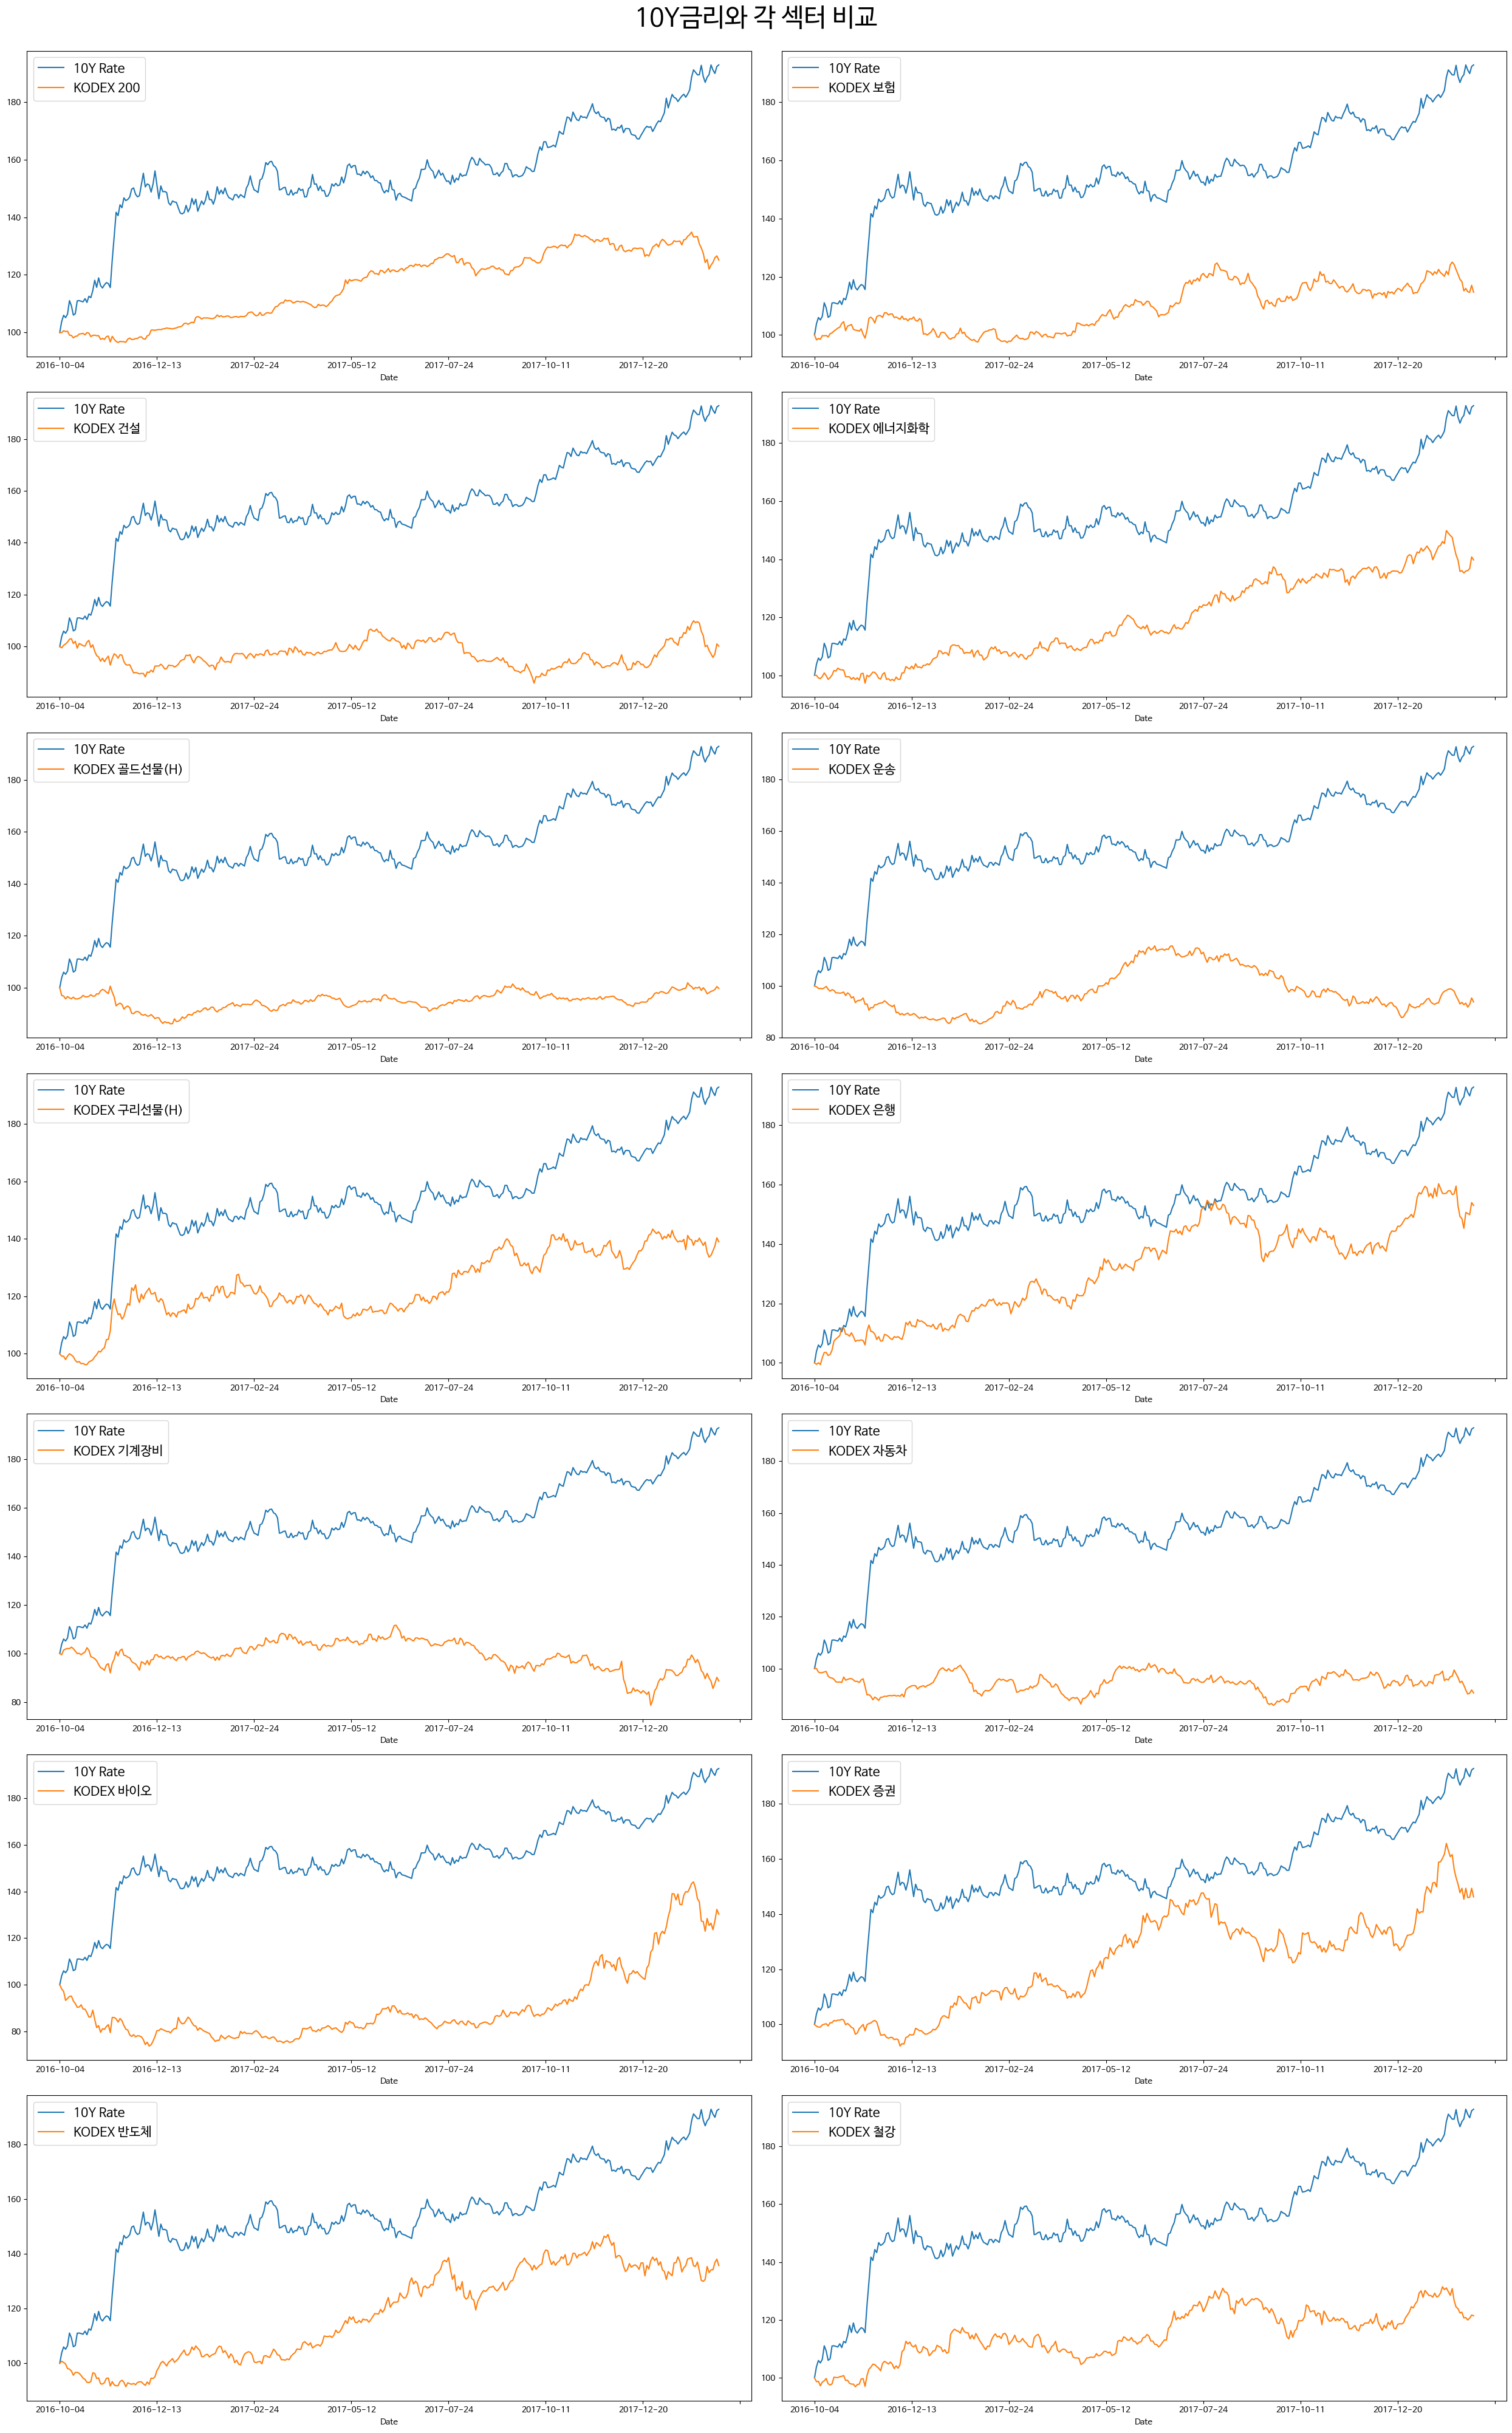

In [ ]:
# 열과 행을 순회하며 각 섹터와 '10Y Rate'를 비교하는 그래프 생성
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(25, 40))
col_index = 1

for col in range(2):

    for row in range(7):

        df_set['10Y Rate'].plot(ax = axes[row, col])
        df_set[df_set.columns[col_index]].plot(ax = axes[row, col])
        col_index += 1
        axes[row,col].legend(fontsize = 15)

fig.suptitle('10Y금리와 각 섹터 비교', fontsize = 30, y = 1)
fig.tight_layout()



## 분석2. Correlation & Return

<ipython-input-22-6071bd091b31>:18: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



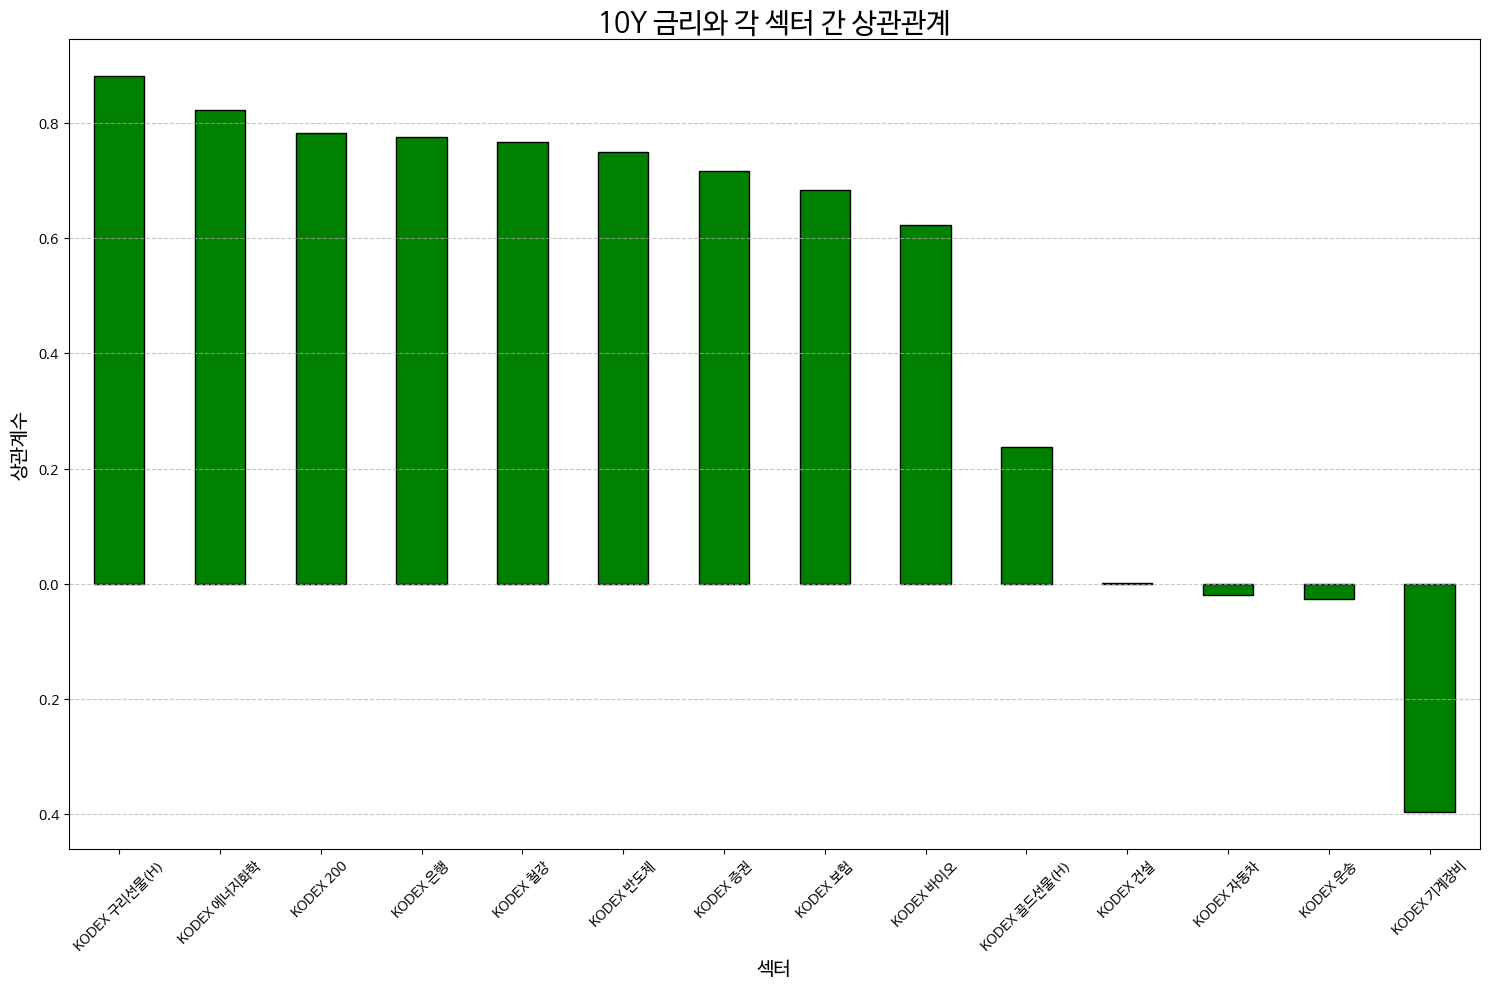

In [ ]:
import matplotlib.pyplot as plt

# 10Y 금리와 다른 섹터 간의 상관관계 계산 및 정렬
df_corr = df_set.corr()['10Y Rate'][1:].sort_values(ascending=False)

# Bar 그래프 생성
plt.figure(figsize=(15, 10))
df_corr.plot(kind='bar', color='green', edgecolor='black')  # 막대 색상과 테두리 설정

# 그래프 제목 및 레이블 설정
plt.title("10Y 금리와 각 섹터 간 상관관계", fontsize=20)
plt.xlabel("섹터", fontsize=14)
plt.ylabel("상관계수", fontsize=14)
plt.xticks(rotation=45)  # X축 레이블 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y축에 그리드 추가

# 그래프 출력
plt.tight_layout()
plt.show()


In [ ]:
# 각 섹터의 총 수익률(Return)을 계산

# 마지막 행(종료 값)과 첫 번째 행(시작 값)을 이용해 수익률 계산
# (마지막 값 - 시작 값) / 시작 값
return_series = (df_set.iloc[df_set.shape[0] - 1] - df_set.iloc[0]) / df_set.iloc[0]

# 계산된 수익률을 내림차순으로 정렬 (높은 수익률부터 나열)
return_series.sort_values(ascending=False)

,0
10Y Rate,0.928522
KODEX 은행,0.529799
KODEX 증권,0.462603
KODEX 에너지화학,0.397541
KODEX 구리선물(H),0.389937
KODEX 반도체,0.357099
KODEX 바이오,0.302897
KODEX 200,0.251406
KODEX 철강,0.214455
KODEX 보험,0.146621


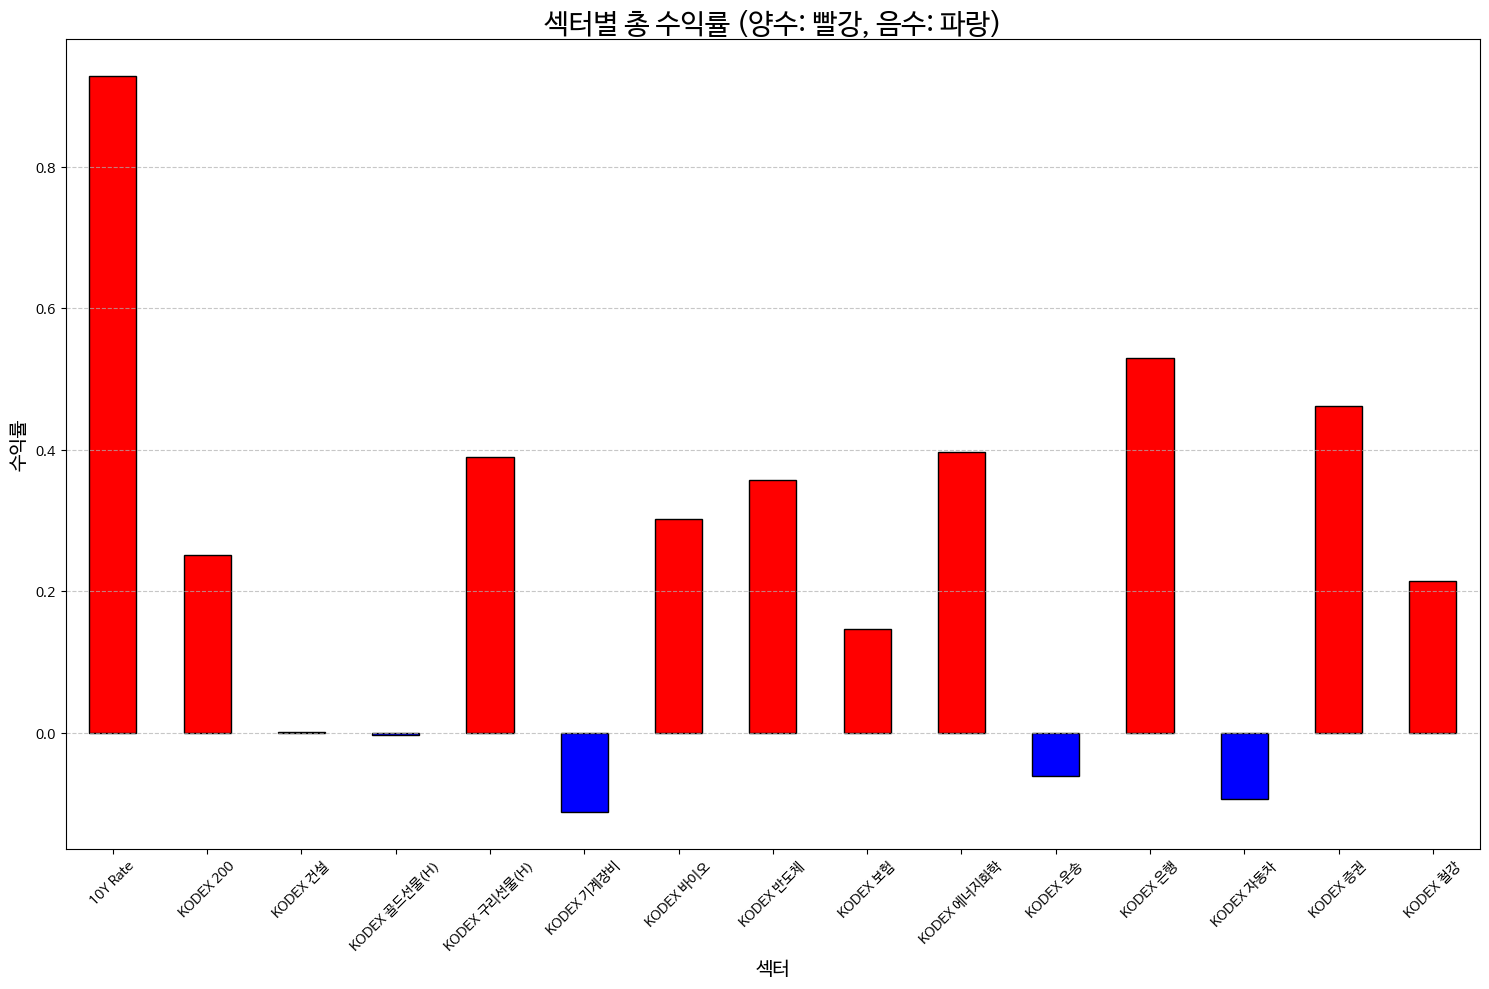

In [ ]:
import matplotlib.pyplot as plt

# 음수와 양수를 다른 색으로 구분하기 위한 색상 리스트 생성
colors = ['red' if value > 0 else 'blue' for value in return_series]

# Bar Chart 시각화
plt.figure(figsize=(15, 10))
return_series.plot(
    kind='bar',
    color=colors,  # 막대 색상 지정
    edgecolor='black'  # 막대 테두리
)

# 그래프 제목 및 축 레이블
plt.title("섹터별 총 수익률 (양수: 빨강, 음수: 파랑)", fontsize=20)
plt.xlabel("섹터", fontsize=14)
plt.ylabel("수익률", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y축에 그리드 추가
plt.tight_layout()
plt.show()


<Axes: xlabel='Date'>

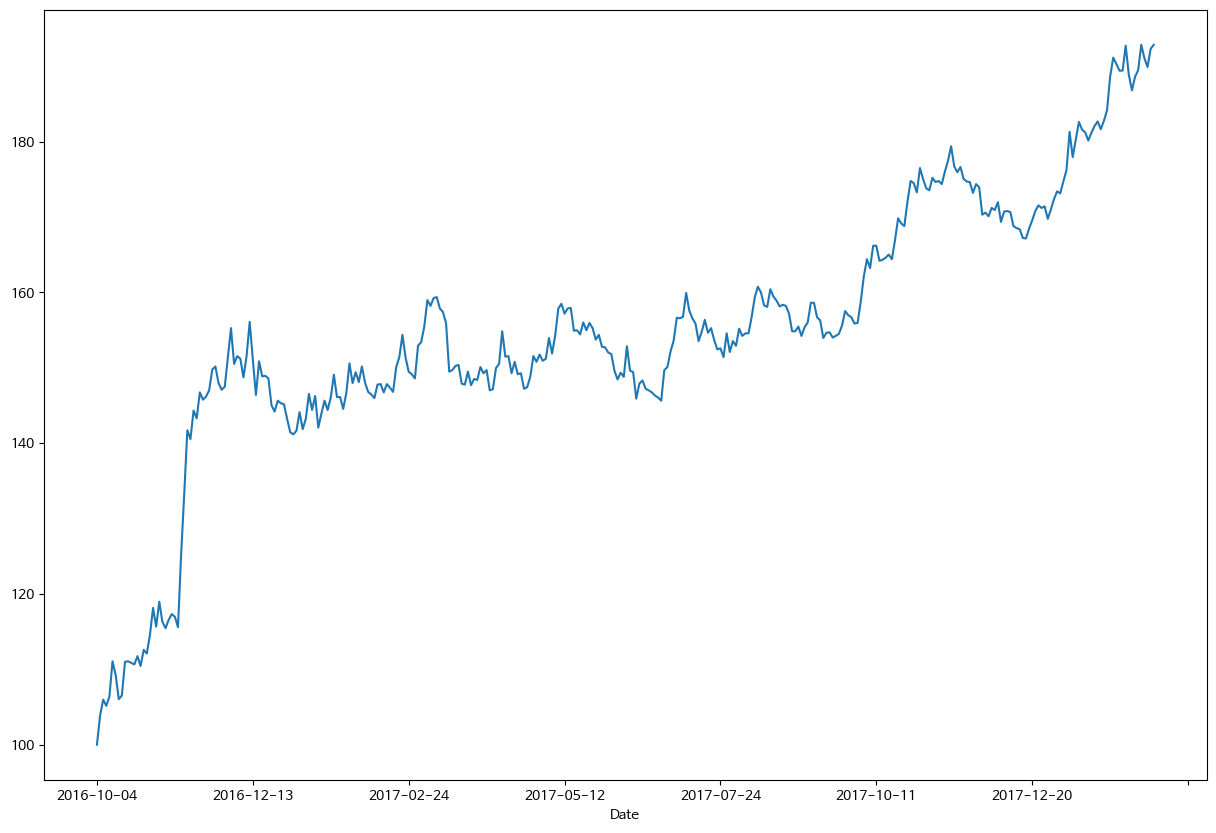

In [ ]:
df_set['10Y Rate'].plot(figsize=(15,10))

In [ ]:
# 특정 날짜('2016-12-13') 기준으로 각 섹터의 수익률(Return)을 계산
# 수익률 = (특정 날짜 값 - 시작 날짜 값) / 시작 날짜 값
return_series_1 = (df_set.loc['2016-12-13'] - df_set.iloc[0])/df_set.iloc[0]


# 계산된 수익률을 내림차순으로 정렬 (높은 수익률부터 표시)
return_series_1.sort_values(ascending = False)

,0
10Y Rate,0.511340
KODEX 구리선물(H),0.186583
KODEX 은행,0.124083
KODEX 철강,0.110848
KODEX 보험,0.054608
KODEX 에너지화학,0.032015
KODEX 200,0.009489
KODEX 기계장비,-0.004789
KODEX 반도체,-0.026180
KODEX 증권,-0.038430
